## Introduction to animation ! 

### This code reads in data recorded by a temperature and humidity sensor, 
### then creates several different kinds of animations of the same data. 

### (1) generate the graphical objects and time series
### (2) generate a simple animation
### (3) read data in and plot it. 
### (4) animate a dot sliding along the data.
### (5) animate a dot moving through 2-D "phase" space (Temp-humidity).
### (6) animate a throbbing dot.
### (7) animate with a background ! 



In [1]:
# all the packages and modules we'll need for now. will import more later. 
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import ffmpy
from IPython.display import HTML

# this tells the notebook kernel to use the graphics engine in the OS
%matplotlib auto 
# %matplotlib notebook
# the animation modules from matplotlib
import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib import rc

import sys
sys.path.append('../modules/')
from importlib import reload

# iPython commands that start with % are called "magics"
# this tells the notebook to show us graphics inline
# this is only meaningful in iPython Notebook, nothing outside iPNb

# this is commented out, because the animation does not work inline-- all figures will pop up windows. 
%matplotlib inline

Using matplotlib backend: Qt5Agg


## ================================================
## take some elements from the previous notebook and animate them: 

In [ ]:
# FIX THIS SO IT HAS AN INIT !!! 

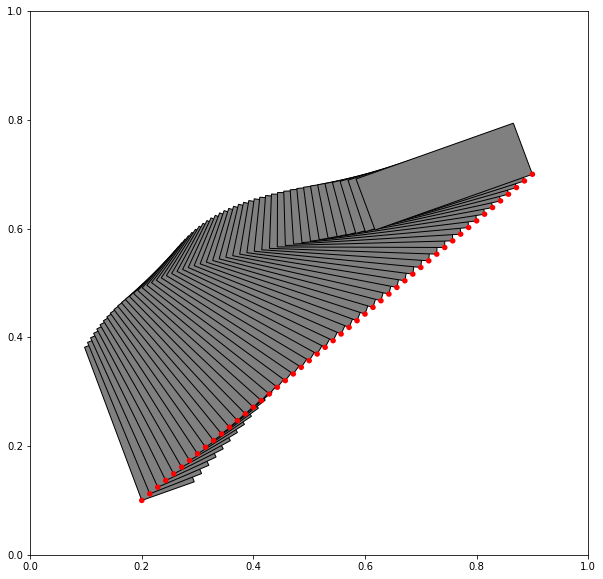

In [95]:
# ANIMATED !
import matplotlib.animation as animation

# translation, rotation

fig10, ax10 = plt.subplots(figsize=(10, 10))

# what do you want to vary? 
# just position
N = 50
x = np.linspace(0.2,0.9,N)
y = np.linspace(0.1,0.7,N)
#angle = np.linspace(0,0,N)
angle = np.linspace(20,110,N)

# constant values: 
height = 0.3
width = 0.1
patch_list = []
rdot_list = []

# generate the list of patch objects, translating and rotating: 
for x1, y1, deg in zip(x, y, angle):
    lefbot = (x1,y1)
    #print(lefbot)
    patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
    patch_list.append(patch1)
    rdot_patch = patches.Circle(lefbot,0.005,fc='red')
    rdot_list.append(rdot_patch)

    
    
# add all those patches to a single axis:
for padd in patch_list:
    ax10.add_patch(padd)
for dot in rdot_list:
    ax10.add_patch(dot)
    

    

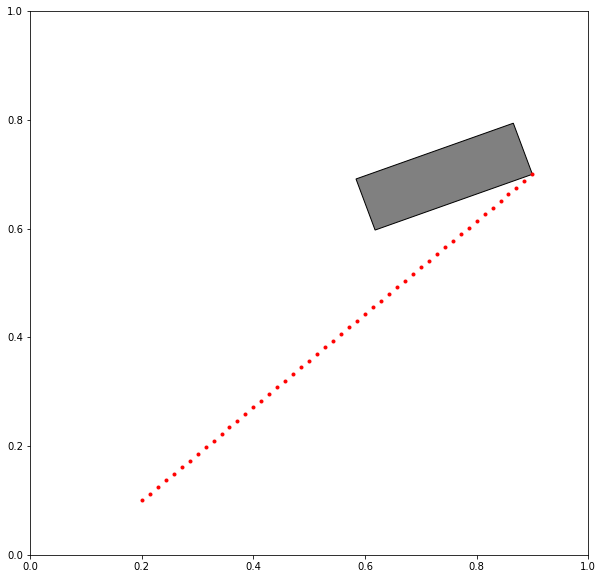

In [96]:
# one way: ArtistAnimation
# generate a list of axes objects: 
fig2, ax2 = plt.subplots(figsize=(10, 10))

ax2.plot(x,y,'r.')
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

patch_list = []
rdot_list = []

# generate the list of patch objects, translating and rotating: 
for x1, y1, deg in zip(x, y, angle):
    lefbot = (x1,y1)
    #print(lefbot)
    patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
    patch_list.append(patch1)
    rdot_patch = patches.Circle(lefbot,0.005,fc='red')
    rdot_list.append(rdot_patch)

# make a list of axes objects:
ims = []
for i in range(len(patch_list)):  
    
    padd = patch_list[i]
    rdot = rdot_list[i]
    im = ax2.add_patch(padd) 
    #im = ax2.add_patch(rdot)
    ims.append([im])
    del im

#print(ims)
#ani = animation.ArtistAnimation(ax10, ims, interval=20, blit=True) #,repeat_delay=1000)
ani = animation.ArtistAnimation(fig2, ims, interval=20) # , blit=True) #,repeat_delay=1000)
HTML(ani.to_html5_video())
#ani.save('rotate_translate.mp4')


num frames = 50
movie_dur = 2.0
frame_interval = 0.04
frames per sec = 25.0


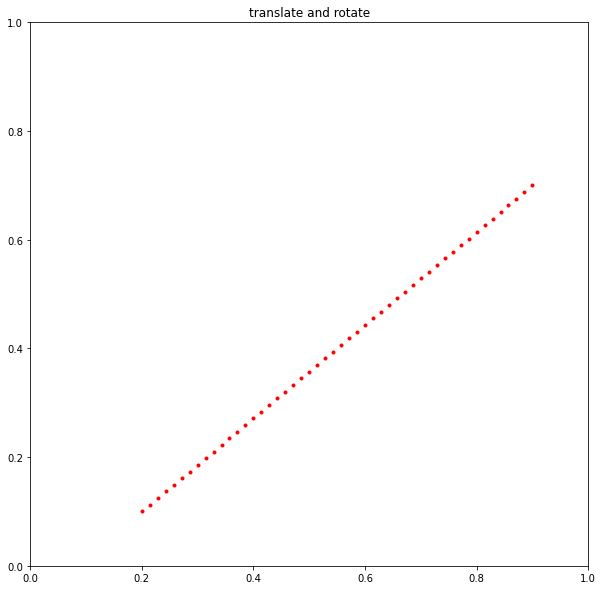

In [97]:
# Another way: FuncAnimation

# define the plot and axes objects:
fig3, ax3 = plt.subplots(figsize=(10, 10))

# define anything static: 
ax3.plot(x,y,'r.')
ax3.set_title('translate and rotate')
ax3.set_xlim([0,1])
ax3.set_ylim([0,1])

#define the patch objects
patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
rdot1 = patches.Circle(lefbot,0.005,fc='red')

# ===================================================
# initialize what will move in the animation: the initial patch positions
def init():
    patch1.xy = (x[0], y[0])
    patch1.angle = angle[0]
    rdot1.xy = (x[0], y[0])
    ax3.add_patch(patch1)
    #ax3.add_patch(rdot1)
    return patch1 #[patch1, rdot1],

# ===================================================
# define what will move in the animation
# (note that this function is not OOP ! two dots moving in here !)
def animate(i): # is this (i) needed for the animate function 
    x1 , y1 = x[i], y[i]
    deg1 = angle[i]
    patch1.xy = (x1 , y1)
    patch1.angle = deg1
    rdot1.xy = (x1 , y1)
    ax3.add_patch(patch1)
    #ax3.add_patch(rdot1)

    return patch1 # [patch1,rdot1],  # i do not know why this comma is here !

# the number of movie frames-- in this case, simply the number of data points. 
dur = 2.0
Nframes = len(x) 
time = np.linspace(0,dur,Nframes)
time_ind_vec = np.arange(0, len(time)-1)

print('num frames = ' + str(Nframes))
print('movie_dur = ' + str(dur))

frame_interval_sec = interv = dur/Nframes
print('frame_interval = ' + str(frame_interval_sec))
fps_ideal = 1./frame_interval_sec
print('frames per sec = ' + str(fps_ideal))

#plt.ioff()

In [98]:
ani = animation.FuncAnimation(fig3, animate, time_ind_vec, interval=interv*1000, init_func=init) #frames=200,blit=True)
HTML(ani.to_html5_video())

## =================================================
## (1) Read in and plot the raw data

In [41]:
# READ IN THE DATA FILE ! ! !

# READ IN THE DATA FILE ! ! !
#datafilename = '../data/breathalyzer/BA_ben_1.pkl'
datafilename = '../data/breathalyzer/y2020-02-13_anna1_37s.pkl'

breath = pd.read_pickle(datafilename) # np.loadtxt(datafilename)
print(breath[0:5])
time = np.array(breath.time_s)
p1 = temp_C = np.array(breath.temp_C)
p2 = humidity = np.array(breath.hum)

dt =  time[-1]-time[-2]
print(dt)
print(len(time))
print(dt*len(time))
print(time[-1])

# put the data into a dictionary: 
# (very useful, but we will also work with pandas)
data_dict = {}
data_dict['time_o'] = time  # the _o indicates these are the original values, un-re-sampled
data_dict['p1_o'] = p1



      hum  temp_C  time_s
0  28.922   25.13  0.0000
1  28.854   25.12  0.3852
2  28.786   25.12  0.7701
3  28.686   25.14  1.1554
4  28.626   25.24  1.5403
0.3780000000000001
99
37.42200000000001
37.2653


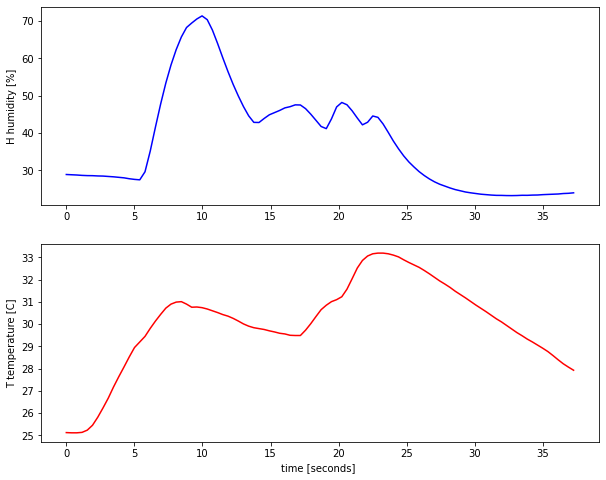

In [42]:
# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time,humidity,'b-')
#plt.xlabel('time')
plt.ylabel('H humidity [%]')

plt.subplot(2,1,2)
plt.plot(time,temp_C,'r-')
plt.xlabel('time [seconds] ')
plt.ylabel('T temperature [C]')

plt.show()

# ============================================
## (2) Animate a dot moving along the data in time... 

In [43]:
# this is a foreshadowing of the next stage, 
# where we will make classes that are the heart of object-oriented programming
# but for now we won't take advantage of the power of OOP, for the sake of transparency ! 
# as we will only have one "instance" of each kind of object. 
# The next notebook will introduce OOP. 

# this is a little class that lets the "patches" object not stretch the dots... 
# it won't make any sense for now, but later it hopefully will ! 
# i found it somewhere but forgot to record where-- 
# but i think there is a probably a simpler way to do this now ! 
# maybe by rescaling the data to [0,1] and then writing the axis labels as the real values ? 
# and an explanation of the @property "decorator": https://www.programiz.com/python-programming/property

class GraphDist() :
    def __init__(self, size, ax, x=True) :
        self.size = size
        self.ax = ax
        self.x = x

    @property
    def dist_real(self) :
        x0, y0 = self.ax.transAxes.transform((0, 0)) # lower left in pixels
        x1, y1 = self.ax.transAxes.transform((1, 1)) # upper right in pixes
        value = x1 - x0 if self.x else y1 - y0
        return value

    @property
    def dist_abs(self) :
        bounds = self.ax.get_xlim() if self.x else self.ax.get_ylim()
        return bounds[0] - bounds[1]

    @property
    def value(self) :
        return (self.size / self.dist_real) * self.dist_abs

    def __mul__(self, obj) :
        return self.value * obj

num frames = 99
movie_dur = 20.0
frame_interval = 0.20202020202020202
frames per sec = 4.95


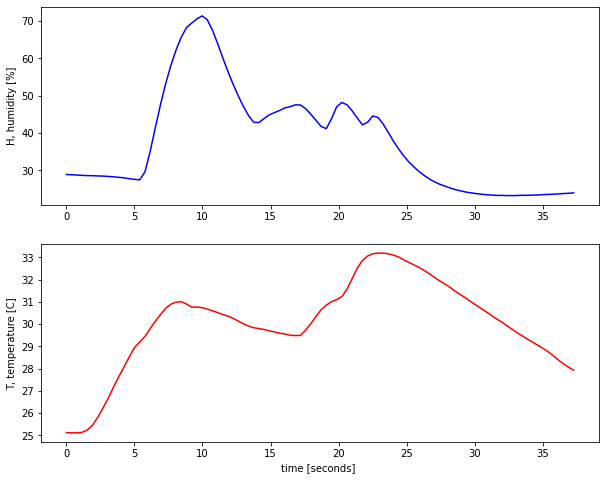

In [44]:
# a nice tutorial for simple animation: 
# https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

# ==================================================
# initialize the objects
fig = plt.figure(figsize=(10,8))
axes1 = plt.subplot(2,1,1) 
axes2 = plt.subplot(2,1,2) 

axes1.plot(time,humidity,'b-')
axes1.set_ylabel('H, humidity [%]')

axes2.plot(time,temp_C,'r-')
axes2.set_xlabel('time [seconds] ')
axes2.set_ylabel('T, temperature [C]')

rad_pix = 20

# here we are using the class above to scale the ellipse axes to the data so they are round dots. 
dot1_width = GraphDist(rad_pix, axes1, True)
dot1_height = GraphDist(rad_pix, axes1, False)
dot2_width = GraphDist(rad_pix, axes2, True)
dot2_height = GraphDist(rad_pix, axes2, False)

# define the patch object.. 
# to learn more about the object, type 
# patch1. then hit [tab] to see what properties the patches.Ellipse have !
patch1 = patches.Ellipse((time[0], humidity[0]), dot1_width, dot1_height, fc='red')
patch2 = patches.Ellipse((time[0], temp_C[0]), dot2_width, dot2_height, fc='blue')

# these would be distorted if you use Circle
# patch2 = patches.Circle((time[0], temp_C[0]),0.1, fc='blue')
# ax1.add_patch(patches.Circle((0.5, 0.5),radius_norm,facecolor="red")) 



# older ways that didn't work: 
#ax.add_artist(Ellipse((1, 3), width, height))
#patches.Circle((0.5, 0.5),radius_norm,facecolor="red"

# ===================================================
# initialize what will move in the animation
def init():
    patch1.center = (time[0], humidity[0])
    patch2.center = (time[0], temp_C[0])
    axes1.add_patch(patch1)
    axes2.add_patch(patch2)
    return patch1, patch2,

# ===================================================
# define what will move in the animation
# (note that this function is not OOP ! two dots moving in here !)
def animate(i): # is this (i) needed for the animate function 
    x , y = time[i], humidity[i]
    patch1.center = (x , y)
    axes1.add_patch(patch1)
    
    x , y = time[i], temp_C[i]
    patch2.center = (x , y)
    axes2.add_patch(patch2)
    
    return patch1,patch2,

# the comma at the end here is important ! i forget why ! 

# ====================================================
# RUN the animation ! 

# the number of movie frames-- in this case, simply the number of data points. 
time_ind_vec = np.arange(0, len(time)-1)

# time interval between frames in milliseconds. 
# figure out the movie duration and frame interval
n_frames = len(time)
print('num frames = ' + str(n_frames))
movie_dur = 20.0 # in seconds
print('movie_dur = ' + str(movie_dur))

frame_interval_sec = interv = movie_dur/n_frames
print('frame_interval = ' + str(frame_interval_sec))
fps_ideal = 1./frame_interval_sec
print('frames per sec = ' + str(fps_ideal))


#plt.show()


plt.ioff()

# from the example: ani = animation.FuncAnimation(fig, notes_time, np.arange(1, len(nums)), init_func=init,
#                             interval=400, blit=True)
#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

In [45]:
# how to play movies inline: 
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# takes a little while to generate, but it will make a video window below... 
ani = animation.FuncAnimation(fig, animate, time_ind_vec, interval=interv*50, init_func=init) #frames=200,blit=True)
HTML(ani.to_html5_video())



In [47]:
# if that doesnt work, try this.. 

ani._repr_html_() is None
#anim
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
HTML(ani.to_html5_video())


In [ ]:
# WHEN you want to save the animation: 
#moviename = 'slidingDotsxTime1.avi'
#ani.save(moviename)

# ============================================
## (3) One dot sliding around 2D space 

num frames = 99
movie_dur = 20.0
frame_interval = 0.20202020202020202
frames per sec = 4.95


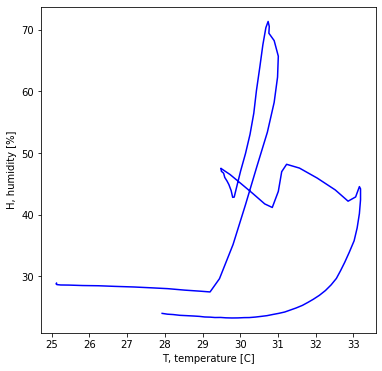

In [48]:
# a nice tutorial for simple animation: 
# https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

# ==================================================
# initialize the objects
fig = plt.figure(figsize=(6,6))
axes1 = plt.subplot(1,1,1) 

axes1.plot(temp_C,humidity,'b-')
axes1.set_xlabel('T, temperature [C]')
axes1.set_ylabel('H, humidity [%]')

rad_pix = 20

# here we are using the class above to scale the ellipse axes to the data so they are round dots. 
dot1_width = GraphDist(rad_pix, axes1, True)
dot1_height = GraphDist(rad_pix, axes1, False)

patch1 = patches.Ellipse((temp_C[0], humidity[0]), dot1_width, dot1_height, fc='red')

# ===================================================
# initialize what will move in the animation
def init():
    patch1.center = (temp_C[0], humidity[0])
    axes1.add_patch(patch1)
    return patch1

# ===================================================
# define what will move in the animation
def animate(i): # is this (i) needed for the animate function 
    x , y = temp_C[i], humidity[i]
    patch1.center = (x , y)
    axes1.add_patch(patch1)    
    return patch1, 

# ====================================================
# RUN the animation ! 

# the number of movie frames-- in this case, simply the number of data points. 
time_ind_vec = np.arange(0, len(time)-1)

# time interval between frames in milliseconds. 
# 30 fps would be 1000/30*dt where dt is the time interval in the original data
# this number determines the speed of the movie.. larger number slows it down; 
# figure out the movie duration and frame interval
n_frames = len(humidity)
print('num frames = ' + str(n_frames))
movie_dur = 20.0 # in seconds
print('movie_dur = ' + str(movie_dur))

frame_interval_sec = movie_dur/n_frames
print('frame_interval = ' + str(frame_interval_sec))
fps_ideal = 1./frame_interval_sec
print('frames per sec = ' + str(fps_ideal))


plt.show()



In [49]:
# RUN (but don't write out to file) the animation: 
ani = animation.FuncAnimation(fig, animate, time_ind_vec, interval=interv*50, init_func=init)# ,blit=True)

#moviename = 'slidingDotsPhaseSpc.avi'
#ani.save(moviename)

In [50]:
HTML(ani.to_html5_video())

# ============================================
## (4) Throbbing dot

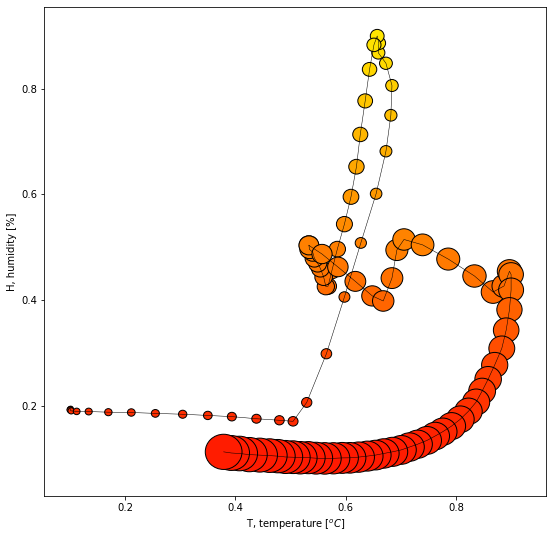

In [51]:
# tutorials on matplotlib patches: 

# ==================================================
# initialize the objects
fig = plt.figure(figsize=(9,9))
axes1 = plt.subplot(1,1,1) 
# when do you need an axes object? 

tempC_n = np.interp(temp_C,[min(temp_C),max(temp_C)],[0.1,0.9])
humidity_n = np.interp(humidity,[min(humidity),max(humidity)],[0.1,0.9])

axes1.plot(tempC_n,humidity_n,'k-', lw=0.5);
axes1.set_xlabel('T, temperature [$^o C$]')
axes1.set_ylabel('H, humidity [%]')

rad_vec = np.linspace(1/200,1/30,len(humidity_n))
humidity_n_vec = np.linspace(min(humidity_n),max(humidity_n),100)
cmap = cm.autumn

patch_list = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_list.append(patch1)

    
for padd in patch_list:
    axes1.add_patch(padd)


In [ ]:
# ==========================================
# stuff to play with-- find when we need these scaling things... 
# here we are using the class above to scale the ellipse axes to the data so they are round dots. 
#dot1_width = GraphDist(rad_pix, axes1, True)
#dot1_height = GraphDist(rad_pix, axes1, False)
#dot2_width = GraphDist(rad_pix, axes2, True)
#dot2_height = GraphDist(rad_pix, axes2, False)

# patch2 = patches.Ellipse((time[0], temp_C[0]), dot2_width, dot2_height, fc='blue')

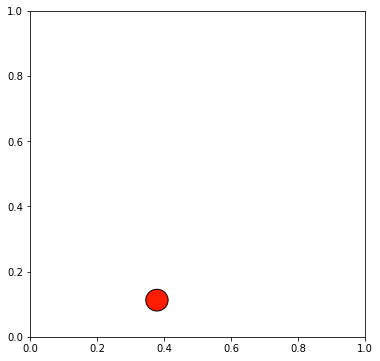

In [52]:
# https://matplotlib.org/gallery/animation/dynamic_image2.html
# ==================================================
# notice 

import matplotlib.animation as animation

patch_listA = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_listA.append(patch1)


fig9, ax9 = plt.subplots(figsize=(6, 6))
# put static image here

ims = []
for i in range(len(patch_list)):   
    padd = patch_listA[i]
    im = ax9.add_patch(padd)
    ims.append([im])

ani = animation.ArtistAnimation(fig9, ims, interval=50, blit=True) #,repeat_delay=1000)
HTML(ani.to_html5_video())
#ani.save('data_dots1.mp4')

## ===============================================================
## and even more abstracted: 

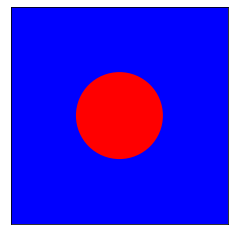

In [53]:
# Create a square with a circle in it.. the circle diameter changes with humidity 
# (tracking the flux of hot wet air)
# and the color changes with the temperature ! 

# http://matthiaseisen.com/pp/patterns/p0203/
# http://matthiaseisen.com/matplotlib/shapes/circle/
# https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
#%matplotlib inline
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

# (0) plot a filled square with a filled circle in it...
# patches.Rectangle((x,y of the lower left corner),width,height, etc...)
ax1.add_patch(patches.Rectangle((0.0, 0.0),1.0,1.0,facecolor="blue"))

radius_norm = 0.2  # radius normalized, scaled to size of box
ax1.add_patch(patches.Circle((0.5, 0.5),radius_norm,facecolor="red")) 
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

rad_val = 0.3949347323714947
dot_col_T = (1.0, 0.8843132468145034, 0.0, 1.0)


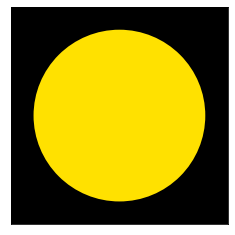

In [54]:
# MAPPING THE PHYSICAL VALUES TO DOT PARAMETERS...
from matplotlib import cm

ind = 25
num_vals = 10

# =====================
# MAP HUMIDITY TO RADIUS
humid_vec = np.linspace(np.min(humidity),np.max(humidity),num_vals)

def scale_radius(humidity_val):
    min_rad = 0.1
    max_rad = 0.4
    radius_vec = np.linspace(min_rad,max_rad,num_vals)
    rad_val = np.interp(humidity_val,humid_vec,radius_vec)
    return rad_val

rad_val_0 = scale_radius(humidity[ind])
print('rad_val = ' + str(rad_val_0))

# =====================
# MAP TEMPERATURE TO COLOR
temp_vec = np.linspace(np.min(temp_C),np.max(temp_C),num_vals)
def color_getter(temp_val):
    #cmap = plt.get_cmap('inferno')
    cmap = cm.hot
    color_vec = np.linspace(0,1,num_vals)
    color_ind = np.interp(temp_val,temp_vec,color_vec)
    dot_col_T = cmap(color_ind)
    return dot_col_T

col0 = color_getter(temp_C[ind])
print('dot_col_T = ' + str(col0) )

# ======================
# REPLOT THE CIRCLE WITH SINGLE VALUES OF THE DATA ! 
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

# (0) plot a filled square with a filled circle in it...
# patches.Rectangle((x,y,lower left corner),width,height)
ax1.add_patch(patches.Rectangle((0.0, 0.0),1.0,1.0,facecolor="black"))

ax1.add_patch(patches.Circle((0.5, 0.5),rad_val_0,facecolor = col0 )) 
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

plt.show()


num frames = 99
movie_dur = 20.0
frame_interval = 0.20202020202020202
frames per sec = 4.95


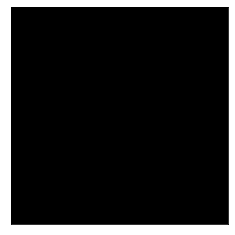

In [55]:
# ANIMATE 
#%matplotlib auto

# flag to determine whether movie gets viewed (0) or recorded (1), not both. 
# view_or_write = 1
# to save, you must first install ffmpeg (and then restart the notebook engine)

fig2 = plt.figure()

ax2 = fig2.add_subplot(111, aspect='equal')
bg_square = patches.Rectangle((0.0, 0.0),1.0,1.0,facecolor="black")
ax2.add_patch(bg_square)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

circle = patches.Circle((0.5, 0.5),0.2,facecolor="black")

# ===================================================
# initialize what will move in the animation
def init():
    col = []
    col = color_getter(temp_C[0])
    rad = scale_radius(humidity[0])
    circle.radius = rad
    circle.set_color(col)
    ax2.add_artist(circle)
    return circle,

# ===================================================
# define what will move in the animation
def animate(i): # is this (i) needed for the animate function ? 
    col = []
    col = color_getter(temp_C[i])
    rad = scale_radius(humidity[i])
    #print(rad)
    circle.radius = rad
    circle.set_color(col)
    ax2.add_artist(circle)   
    return circle,


# the number of movie frames-- in this case, simply the number of data points. 
time_ind_vec = np.arange(0, len(time)-1)

# figure out the movie duration and frame interval
n_frames = len(humidity)
print('num frames = ' + str(n_frames))
movie_dur = 20.0 # in seconds
print('movie_dur = ' + str(movie_dur))

frame_interval_sec = movie_dur/n_frames
print('frame_interval = ' + str(frame_interval_sec))
fps_ideal = 1./frame_interval_sec
print('frames per sec = ' + str(fps_ideal))

#anim = animation.FuncAnimation(fig2, animate, init_func=init, frames=len(humidity), interval=interv) 
                                #,repeat=False) 
#                               blit=True)

# if view_or_write==0:
#     plt.show()
# elif view_or_write==1:

#anim.save(movie_name, fps=fps_ideal, extra_args=['-vcodec', 'h264','-pix_fmt', 'yuv420p'])
# check exact duration of movie with >> ffprobe [moviename]


In [56]:
ani = animation.FuncAnimation(fig2, animate, time_ind_vec, interval=interv*100, init_func=init)# ,blit=True)

HTML(ani.to_html5_video())



In [ ]:
#moviename = 'throbbingDot1.avi'
#ani.save(moviename,extra_args=['-vcodec', 'h264','-pix_fmt', 'yuv420p']) # extra_args=['-vcodec', 'h264','-pix_fmt', 'yuv420p']

In [56]:
# make a class for that circle defined by the two params, 
# then a list or array of each persons breath, associated with their data. 
# and add them to the array
# then in animate it will loop through the list of the circle class instances (structure: array) 
# then a loop for each circle in circle_array, do this.. 
# then the same thing inside animate... 

In [ ]:
# add background to the movie above: 


# ==================================================
# read in the background image
bg_image = '../data/WallowaMtnsOR.png'
img=mpimg.imread(bg_image)
sz_x,sz_y,col_depth = img.shape
print(sz_x,sz_y,col_depth)

# ==================================================
# make the list of patch objects
patch_listA = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_listA.append(patch1)

    
# ==========================
# SETUP THE PLOT 
#fig10 = plt.figure(figsize=(6,6))
# axes1 = plt.subplot(1,1,1) 
 
fig11, ax11 = plt.subplots(figsize=(6, 6))

ims = []
for i in range(len(patch_list)):   
    padd = patch_listA[i]
    im = ax11.add_patch(padd)
    ims.append([im])

ani = animation.ArtistAnimation(fig11, ims, interval=50, blit=True) #,repeat_delay=1000)
ax11.imshow(img)
#ani.save('datadots_bgimg.mp4', writer = 'ffmpeg', fps=30)
